#### Lab 1 - Python fundamentals

**Purspose**<br>
To use to use fundamentals of python to transform raw data to representable format.<br>
More specifically, you will perform a step in decoding DNA data.<br> This can be a common topic for a
data analyst or data scientist in a medtech company.<br> 
You do not need prior knowledge about DNA for this lab.


skall presentations delen vara dynamisk, så den är anpassad efter hur många diagram som skall visas. 

First look at the dna_raw.txt

In [65]:
from collections import Counter
import matplotlib.pyplot as plt

In [78]:


# temporary variable to hold the current sequence ID while reading the file                                                                                                                                                                       
current_seq_id = ""
current_seq_data = ""

# List to store tuples of (sequence ID, DNA string)
sequence_data = []

# open the file and read all lines into memory
with open("dna_raw_complicated.txt", "r") as dna_file:
     dna_file = dna_file.readlines()

     # loop through each line in the file
     for line in dna_file:
                   
            # if the line starts with '>seq', it represents a new sequence header
            if line[0:4] == ">seq":
                    if current_seq_id != "":   # check if we have a seqeunce in progress, save it before starting a new one                                           
                         sequence_data.append((current_seq_id, current_seq_data))
                         current_seq_data = ""  # reset DNA buffer for the new sequence
                    # update current_seq_id with the new line and remove "\n"  
                    current_seq_id = line.strip()

            # Otherwise the line is a part of the DNA sequence                        
            else:
               # Add this line to current_seq_data, and set data to lowercase...furthermore, "\n" is removed  
               current_seq_data += line.strip().lower()
  
# after the loop we must check if final sequence is saved.
if current_seq_id != "":
        sequence_data.append((current_seq_id, current_seq_data))
      
sequence_data          

# Dictionary to store frequency counts of each base per sequence
sequence_frequencies = {}

# loop through each sequence and count base occurrences 
for seq_id, dna_seqeunce in sequence_data:
      base_counts = Counter(dna_seqeunce)  # Count each base (a, c, g, t, n)
      sequence_frequencies[seq_id] = dict(base_counts) # Store as dictionary per sequence

# Display the final dictionary containing all sequences and base frequencies
sequence_frequencies


{'>seq1': {'c': 8, 'g': 2, 't': 7, 'a': 17},
 '>seq2': {'a': 3, 'g': 10, 'c': 4, 't': 7},
 '>seq3': {'g': 21, 'c': 34, 'a': 36, 't': 19, 'n': 2},
 '>seq4': {'g': 20, 'c': 15, 'a': 17, 't': 12},
 '>seq5': {'g': 17, 'c': 15, 'a': 15, 't': 12}}

In [69]:
import numpy as np
import math # to be able to use math.ceil i need to import "math" 

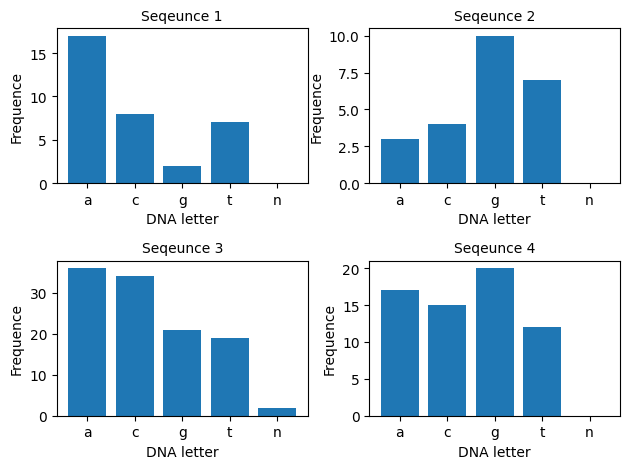

In [76]:
# Calculate how many seqeunces there are in the dictionary. 
num_seq = len(sequence_frequencies) 

# Dynamically calculate how many rows and columns are needed for the subplot grid
rows = math.ceil(math.sqrt(num_seq)) # Number of rows runded up 
cols = math.ceil(num_seq / rows)     # Number of columns rounded up

# Create the figure and a grid of subplots 
dna_figure, subplot_axes = plt.subplots(rows, cols) # "dna_fig" is the draw area 

# Flatten the 2D array of axes objects into a 1D list
# This makes it easier to loop through and access each subplot
subplot_area = subplot_axes.flatten() 

# define a fixed bilogical order for the DNA bases (x-axis) 
# Using A,C,G,T as standard order, 'N' added last for unknown bases.
base_order = ["a","c","g","t","n"]

# Loop through each DNA sequence and plot each subplot
for i, (seq_name, freq_dict) in enumerate(sequence_frequencies.items()):
    
    # Select the subplot (axis) that corresponds to the current sequence
    seq_plot = subplot_area[i]
   
    # Create a list for frequences in the same order as "base_order".
    # if base not exist in the sequence, return 0 for avoid KeyError.
    Values = [freq_dict.get(base, 0) for base in base_order]

    # Set the title of each seqeunce dynamically
    # seq_name[4:0] extracts only the sequence number from the strings like ">seq1"
    seq_plot.set_title(f"Seqeunce {seq_name[4:]}", fontsize = 10)
    
    # Draw a bar chart for the current sequence
    seq_plot.bar(base_order, Values)

    # Label the x- and y-axes
    seq_plot.set_xlabel("DNA letter")
    seq_plot.set_ylabel("Frequence")

# Adjust spacing between subplots so titles and labels do not ovelap
plt.tight_layout()




In [ ]:
# source: https://www.digitalocean.com/community/tutorials/python-add-to-dictionary#adding-to-a-dictionary-using-the-update-operator
# source: https://realpython.com/sort-python-dictionary/ 




# sort the dictionary by value 
# dict(sorted(dna_sequnce_1.items(), key=lambda item: item[1]))


In [ ]:
# source https://www.w3schools.com/python/matplotlib_bars.asp
# source https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
# source https://www.w3schools.com/python/matplotlib_labels.asp
# source https://www.datacamp.com/tutorial/python-bar-plot

# import matplotlib.pyplot as plt

# plt.bar(dna_sequnce_3.keys(), dna_sequnce_3.values())
# plt.title("DNA sequence 3")
# plt.ylabel("Frequency")
# plt.xlabel("DNA Letters")
# plt.show